In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 添加层
def add_layer(inputs, in_size, out_size, activation_function=None):
    # 方向和矩阵平常写的是倒的
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(
                tf.random_normal([in_size, out_size]),
            name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,
            name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_puls_b = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = Wx_puls_b
        else:
            outputs = activation_function(Wx_puls_b)
        return outputs

In [4]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
print(x_data)
# 噪声
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

[[-1.        ]
 [-0.99331105]
 [-0.9866221 ]
 [-0.9799331 ]
 [-0.97324413]
 [-0.9665552 ]
 [-0.9598662 ]
 [-0.9531773 ]
 [-0.9464883 ]
 [-0.9397993 ]
 [-0.93311036]
 [-0.9264214 ]
 [-0.91973245]
 [-0.9130435 ]
 [-0.9063545 ]
 [-0.89966553]
 [-0.8929766 ]
 [-0.8862876 ]
 [-0.8795987 ]
 [-0.8729097 ]
 [-0.8662207 ]
 [-0.85953176]
 [-0.8528428 ]
 [-0.84615386]
 [-0.8394649 ]
 [-0.8327759 ]
 [-0.82608694]
 [-0.819398  ]
 [-0.81270903]
 [-0.8060201 ]
 [-0.7993311 ]
 [-0.7926421 ]
 [-0.78595316]
 [-0.7792642 ]
 [-0.77257526]
 [-0.7658863 ]
 [-0.7591973 ]
 [-0.75250834]
 [-0.7458194 ]
 [-0.73913044]
 [-0.7324415 ]
 [-0.72575253]
 [-0.7190635 ]
 [-0.71237457]
 [-0.7056856 ]
 [-0.69899666]
 [-0.6923077 ]
 [-0.68561876]
 [-0.67892975]
 [-0.6722408 ]
 [-0.66555184]
 [-0.6588629 ]
 [-0.65217394]
 [-0.6454849 ]
 [-0.638796  ]
 [-0.632107  ]
 [-0.62541807]
 [-0.6187291 ]
 [-0.61204016]
 [-0.60535115]
 [-0.5986622 ]
 [-0.59197325]
 [-0.5852843 ]
 [-0.57859534]
 [-0.5719063 ]
 [-0.5652174 ]
 [-0.55852

In [4]:
l1 = add_layer(xs, 1, 10, 
               activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.reduce_sum(
            tf.square(ys - prediction),reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter('logs/', sess.graph)
sess.run(init)

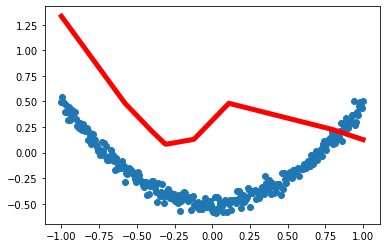

0.4289938


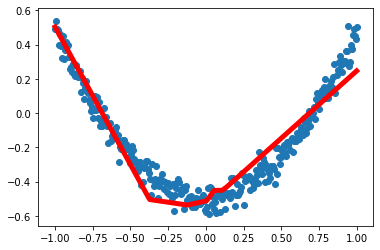

0.008252149


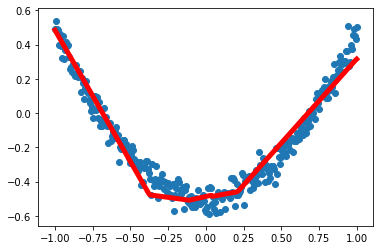

0.004896562


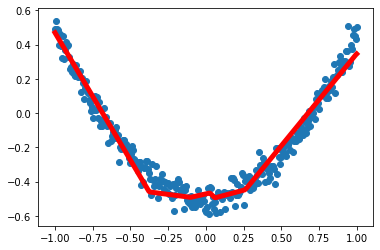

0.0039927685


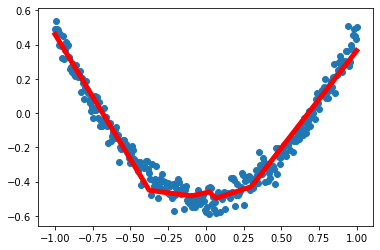

0.003602683


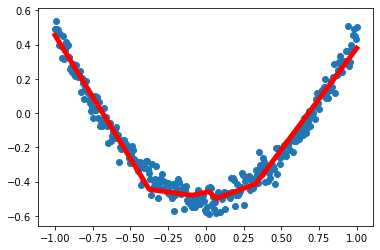

0.0033906677


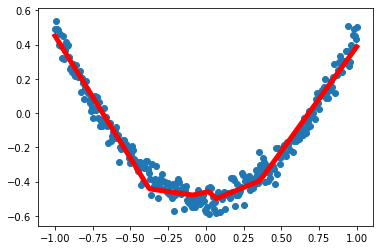

0.0032418803


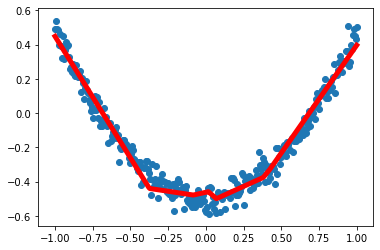

0.0030830845


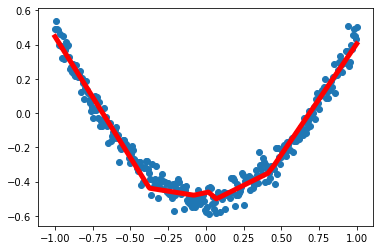

0.0029461985


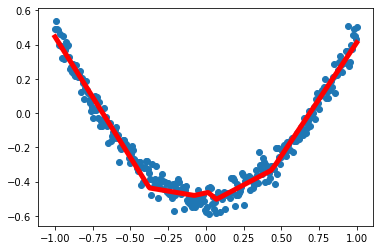

0.0028658481


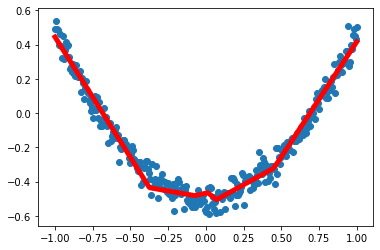

0.0028128484


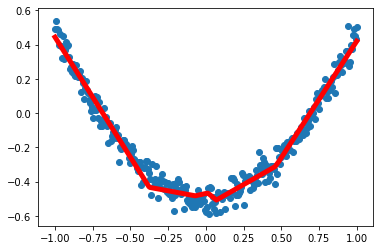

0.0027738153


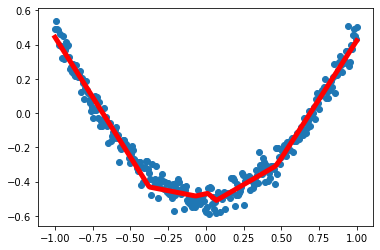

0.0027498482


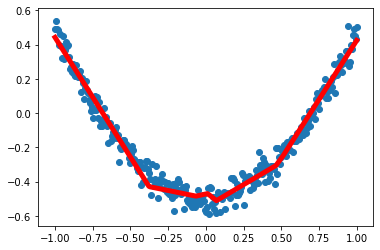

0.0027295619


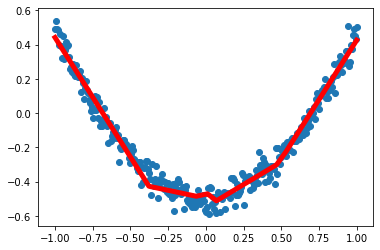

0.0027067196


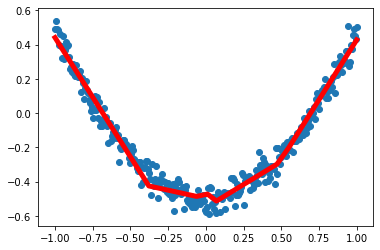

0.0026862707


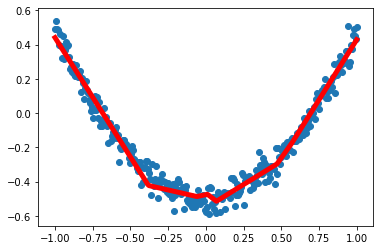

0.0026653553


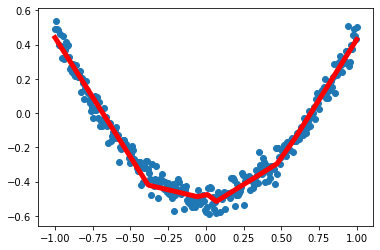

0.0026465824


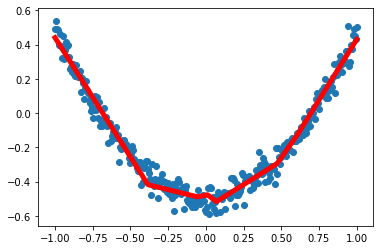

0.0026317295


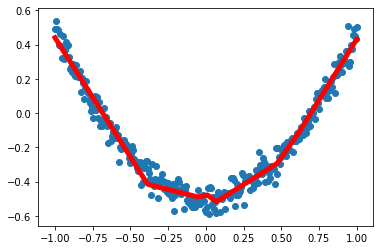

0.0026175142


In [6]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        try: 
            #ax.lines.remove(lines[0])
            pass
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(x_data, y_data)
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.show()
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        plt.pause(0.1)